In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win)

In [2]:
#Cell_2.
csv_in="stock-D.csv"
df_a = pd.read_csv(csv_in,skiprows=0,header=0,delimiter=',',encoding="utf-8")
print(df_a.shape) #確認
print(df_a.info()) #確認
display(df_a.head()) #確認

print(type(df_a['日付'][0]))
df_a['日付']=pd.to_datetime(df_a['日付'])
print(type(df_a['日付'][0]))

print(df_a.info()) #確認

(120, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付      120 non-null    object 
 1   始値      120 non-null    float64
 2   高値      120 non-null    float64
 3   安値      120 non-null    float64
 4   終値      120 non-null    float64
 5   出来高     120 non-null    int64  
 6   終値調整値   120 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.7+ KB
None


,日付,始値,高値,安値,終値,出来高,終値調整値
0,2018-01-04,893.0,893.7,884.3,1890.5,21669000,890.5
1,2018-01-05,892.9,903.5,892.2,1896.6,25565000,896.6
2,2018-01-09,910.0,914.9,907.1,1912.5,24605000,912.5
3,2018-01-10,912.0,917.8,906.2,1917.5,20409000,917.5
4,2018-01-11,911.1,914.3,904.6,1914.3,13674000,914.3


<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      120 non-null    datetime64[ns]
 1   始値      120 non-null    float64       
 2   高値      120 non-null    float64       
 3   安値      120 non-null    float64       
 4   終値      120 non-null    float64       
 5   出来高     120 non-null    int64         
 6   終値調整値   120 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 6.7 KB
None


In [3]:
#Cell_3.
df_d=df_a.copy()
df_d['日付']-=df_d['日付'][0]
print(type(df_d['日付'][0]))
df_d['日付']/=np.timedelta64(1,'D')
print(type(df_d['日付'][0]))
print(df_d.head())

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
<class 'numpy.float64'>
    日付     始値     高値     安値      終値       出来高  終値調整値
0  0.0  893.0  893.7  884.3  1890.5  21669000  890.5
1  1.0  892.9  903.5  892.2  1896.6  25565000  896.6
2  5.0  910.0  914.9  907.1  1912.5  24605000  912.5
3  6.0  912.0  917.8  906.2  1917.5  20409000  917.5
4  7.0  911.1  914.3  904.6  1914.3  13674000  914.3


In [4]:
#Cell_4.
df_d['week']=0
print(df_d.shape)
display(df_d.head())

(120, 8)


,日付,始値,高値,安値,終値,出来高,終値調整値,week
0,0.0,893.0,893.7,884.3,1890.5,21669000,890.5,0
1,1.0,892.9,903.5,892.2,1896.6,25565000,896.6,0
2,5.0,910.0,914.9,907.1,1912.5,24605000,912.5,0
3,6.0,912.0,917.8,906.2,1917.5,20409000,917.5,0
4,7.0,911.1,914.3,904.6,1914.3,13674000,914.3,0


In [5]:
#Cell_5.
df_d['week'] = df_d['日付']//7 + 1

In [6]:
#Cell_6.
display(df_d.head())
display(df_d.tail())

,日付,始値,高値,安値,終値,出来高,終値調整値,week
0,0.0,893.0,893.7,884.3,1890.5,21669000,890.5,1.0
1,1.0,892.9,903.5,892.2,1896.6,25565000,896.6,1.0
2,5.0,910.0,914.9,907.1,1912.5,24605000,912.5,1.0
3,6.0,912.0,917.8,906.2,1917.5,20409000,917.5,1.0
4,7.0,911.1,914.3,904.6,1914.3,13674000,914.3,2.0


,日付,始値,高値,安値,終値,出来高,終値調整値,week
115,169.0,772.2,784.9,771.0,1783.0,11868000,783.0,25.0
116,172.0,786.0,792.2,780.2,1781.6,9352000,781.6,25.0
117,173.0,777.8,785.3,774.0,1779.1,14870000,779.1,25.0
118,174.0,780.5,782.9,766.7,1768.3,13656000,768.3,25.0
119,175.0,765.9,773.1,764.0,1772.2,12331000,772.2,26.0


In [7]:
#Cell_7.
#Extract 2018 and onward.
interest = pd.read_csv('d1-5-5.csv',skiprows=525,encoding='cp932')
display(interest.head(26))

,Unnamed: 0,1.5,0,-0.06,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,18.0,1.50,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.50,0,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.50,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.50,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.50,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.50,0,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.50,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1.50,0,-0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1.50,0,-0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.50,0,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Cell_8.
interest=interest.iloc[:,0:4]
interest.columns=['week','US','EUR','JP']
display(interest.head())
print(interest.info())
for i in range(26):
    interest.loc[i,'week']=i+1
display(interest.head(26))


,week,US,EUR,JP
0,18.0,1.5,0,-0.04
1,NaN,1.5,0,-0.03
2,NaN,1.5,0,-0.04
3,NaN,1.5,0,-0.04
4,NaN,1.5,0,-0.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    2 non-null      float64
 1   US      77 non-null     float64
 2   EUR     77 non-null     int64  
 3   JP      77 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.5 KB
None


,week,US,EUR,JP
0,1.0,1.50,0,-0.04
1,2.0,1.50,0,-0.03
2,3.0,1.50,0,-0.04
3,4.0,1.50,0,-0.04
4,5.0,1.50,0,-0.04
5,6.0,1.50,0,-0.03
6,7.0,1.50,0,-0.04
7,8.0,1.50,0,-0.05
8,9.0,1.50,0,-0.05
9,10.0,1.50,0,-0.06


In [9]:
#Cell_9.
interest2 = interest.iloc[0:26,:]
display(interest2)

,week,US,EUR,JP
0,1.0,1.50,0,-0.04
1,2.0,1.50,0,-0.03
2,3.0,1.50,0,-0.04
3,4.0,1.50,0,-0.04
4,5.0,1.50,0,-0.04
5,6.0,1.50,0,-0.03
6,7.0,1.50,0,-0.04
7,8.0,1.50,0,-0.05
8,9.0,1.50,0,-0.05
9,10.0,1.50,0,-0.06


In [10]:
#Cell_10.
df2= pd.merge(df_d,interest2,on='week',how='left')
display(df2.head())
display(df2.tail())

,日付,始値,高値,安値,終値,出来高,終値調整値,week,US,EUR,JP
0,0.0,893.0,893.7,884.3,1890.5,21669000,890.5,1.0,1.5,0,-0.04
1,1.0,892.9,903.5,892.2,1896.6,25565000,896.6,1.0,1.5,0,-0.04
2,5.0,910.0,914.9,907.1,1912.5,24605000,912.5,1.0,1.5,0,-0.04
3,6.0,912.0,917.8,906.2,1917.5,20409000,917.5,1.0,1.5,0,-0.04
4,7.0,911.1,914.3,904.6,1914.3,13674000,914.3,2.0,1.5,0,-0.03


,日付,始値,高値,安値,終値,出来高,終値調整値,week,US,EUR,JP
115,169.0,772.2,784.9,771.0,1783.0,11868000,783.0,25.0,2.0,0,-0.08
116,172.0,786.0,792.2,780.2,1781.6,9352000,781.6,25.0,2.0,0,-0.08
117,173.0,777.8,785.3,774.0,1779.1,14870000,779.1,25.0,2.0,0,-0.08
118,174.0,780.5,782.9,766.7,1768.3,13656000,768.3,25.0,2.0,0,-0.08
119,175.0,765.9,773.1,764.0,1772.2,12331000,772.2,26.0,2.0,0,-0.07


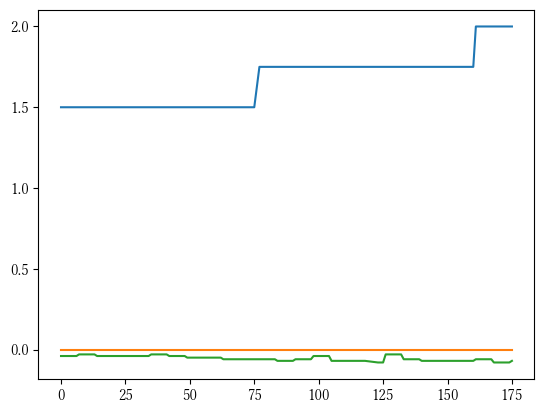

In [11]:
#Cell_11.
plt.plot(df2['日付'],df2['US'])
plt.plot(df2['日付'],df2['EUR'])
plt.plot(df2['日付'],df2['JP'])
plt.show()

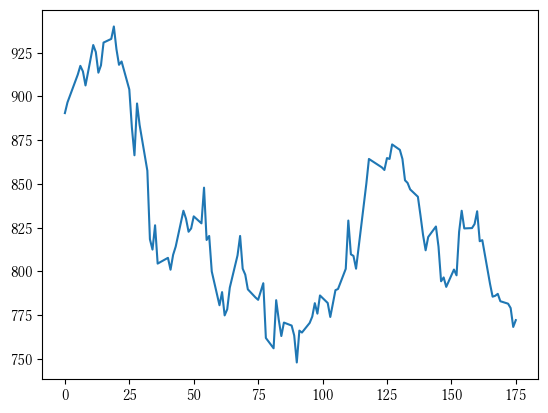

In [12]:
#Cell_12.
plt.plot(df2['日付'],df2['終値調整値'])
plt.show()

In [13]:
#Cell_13.
X = df2[['日付','US','JP']]
Y = df2[['終値調整値']]

In [14]:
#Cell_14.
X_c=sm.add_constant(X)
model=sm.OLS(Y,X_c)

In [15]:
#Cell_15.
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  終値調整値   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     17.94
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.24e-09
Time:                        11:17:20   Log-Likelihood:                -613.01
No. Observations:                 120   AIC:                             1234.
Df Residuals:                     116   BIC:                             1245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        943.5454     73.692     12.804      0.0

In [16]:
#Cell_16.
X_dumm=X.copy()
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(Y)

In [17]:
#Cell_17.
model = sm.OLS(y_scaled_ar, X_scaled_ar)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.317
Model:                            OLS   Adj. R-squared (uncentered):              0.299
Method:                 Least Squares   F-statistic:                              18.10
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                    1.03e-09
Time:                        11:17:20   Log-Likelihood:                         -147.40
No. Observations:                 120   AIC:                                      300.8
Df Residuals:                     117   BIC:                                      309.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
#Cell_18.
X_test = pd.DataFrame([[1,100, 2.0, 0.002],
                        ],
                        columns=X_c.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,const,日付,US,JP
0,1,100,2.0,0.002


In [19]:
#Cell_19.
#X_test_c = sm.add_constant(X_test)
y_test = results.predict(X_test)
print('Predicted y:')
print(y_test)

Predicted y:
0    877.185738
dtype: float64
